In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
import numpy as np

import requests
import zipfile
from pathlib import Path
import os

from PIL import Image

import random

from typing import List, Tuple, Dict
from tqdm.auto import tqdm

c:\Users\dixit\anaconda3\envs\pytorch_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# import requests
# import zipfile
# from pathlib import Path

# data_path = Path("data/")
# image_path = data_path / "pizza_steak_sushi"

# if image_path.is_dir():
#     print("Image directory already exists") 
# else:
#     image_path.mkdir(parents=True, exist_ok=True)
#     with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
#         response = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip?raw=true")
#         f.write(response.content)

#     with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
#         zip_ref.extractall(image_path)

In [4]:
home_path = Path.cwd()
home_path

WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets')

In [5]:
data_path = home_path / "data"
image_path = data_path / "pizza_steak_sushi"

In [6]:
if image_path.is_dir():
    print("Image directory already exists")
else:
    image_path.mkdir(parents=True, exist_ok=True)
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        response = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip?raw=true")
        f.write(response.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        zip_ref.extractall(image_path)

Image directory already exists


In [7]:
train_path = image_path / "train"
test_path = image_path / "test"

train_path, test_path

(WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/train'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/test'))

In [8]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list[:5]

[WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/test/pizza/194643.jpg')]

In [9]:
train_images = list(train_path.glob("*/*.jpg"))

train_images[:5]

[WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/train/pizza/1008844.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/train/pizza/1033251.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/train/pizza/1044789.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/train/pizza/1089334.jpg'),
 WindowsPath('c:/Users/dixit/Documents/PiaD/4_custom_datasets/data/pizza_steak_sushi/train/pizza/1105700.jpg')]

Image class: sushi
Image size: (512, 384)


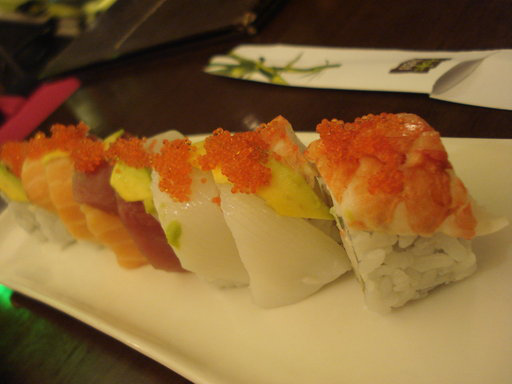

In [10]:
random_image = random.choice(train_images)
random_image_class = random_image.parent.stem
random_image_class

print(f"Image class: {random_image_class}")
print(f"Image size: {Image.open(random_image).size}")
Image.open(random_image)

(384, 512, 3)


(-0.5, 511.5, 383.5, -0.5)

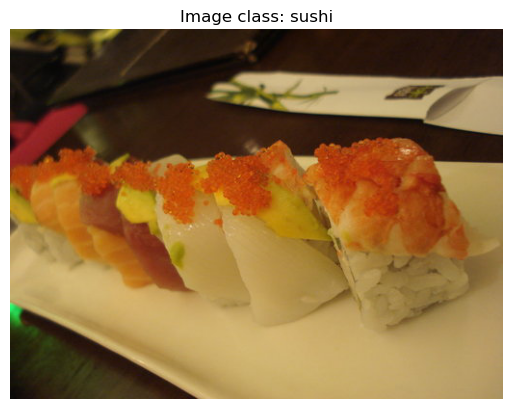

In [11]:
img_to_numpy = np.array(Image.open(random_image))
print(img_to_numpy.shape)
plt.imshow(img_to_numpy)
plt.title(f"Image class: {random_image_class}")
plt.axis(False)

## Transforming data 

* Turn the images into tensors
* Create a dataset and dataloader

#### Utilizing torch.transforms

In [12]:
data_transforms = transforms.Compose([
    transforms.Resize(size = [64, 64]),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])

In [13]:
temp = data_transforms(Image.open(random_image))

(-0.5, 63.5, 63.5, -0.5)

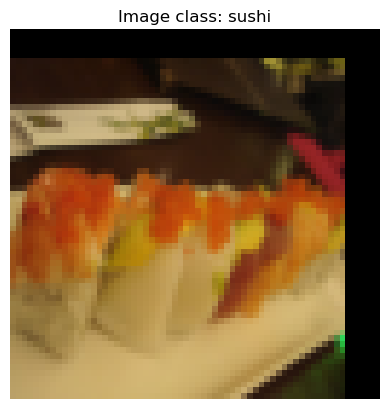

In [14]:
temp = temp.permute(1, 2, 0)
temp.to("cpu")
temp = temp.numpy()

plt.imshow(temp)
plt.title(f"Image class: {random_image_class}")
plt.axis(False)

#### Building a function to plot the tranformed image against a given image

In [15]:
def random_image_transform(list, transforms: transforms.Compose):

    random_image = random.choice(list)
    random_image_class = random_image.parent.stem

    img_to_numpy = np.array(Image.open(random_image))
    print(img_to_numpy.shape)

    temp = transforms(Image.open(random_image))
    temp = temp.permute(1, 2, 0)

    plt.subplot(1, 2, 1)
    plt.imshow(img_to_numpy)
    plt.title(f"Image class: {random_image_class}")
    plt.axis(False)

    plt.subplot(1, 2, 2)
    plt.imshow(temp)
    plt.title(f"Image class: {random_image_class}")
    plt.axis(False)

    plt.show()

(512, 512, 3)


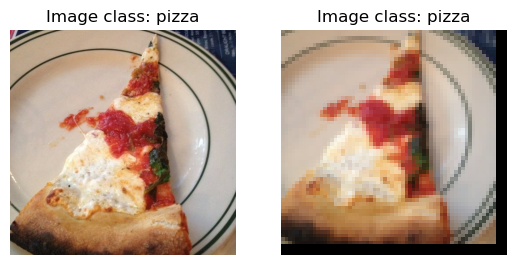

In [16]:
random_image_transform(train_images, data_transforms)

### Option 1: Using ImageFolder from torchVision for creating a dataloader

In [17]:
train_data = datasets.ImageFolder(root=train_path, transform=data_transforms)
test_data = datasets.ImageFolder(root=test_path, transform=data_transforms)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: c:\Users\dixit\Documents\PiaD\4_custom_datasets\data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1))
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: c:\Users\dixit\Documents\PiaD\4_custom_datasets\data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1))
                ToTensor()
            ))

In [18]:
class_to_idx = train_data.class_to_idx
class_names = train_data.classes

class_to_idx, class_names

({'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])

(-0.5, 63.5, 63.5, -0.5)

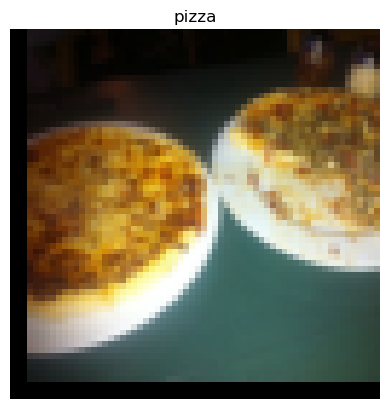

In [19]:
image, label = train_data[0][0], train_data[0][1]
label = class_names[label]

plt.imshow(image.permute(1, 2, 0))
plt.title(label)
plt.axis(False)

In [20]:
trainDataLoader = DataLoader(train_data, batch_size=32, shuffle=True)
testDataLoader = DataLoader(test_data, batch_size=32, shuffle=False)

trainDataLoader, testDataLoader

(<torch.utils.data.dataloader.DataLoader at 0x286e4946e00>,
 <torch.utils.data.dataloader.DataLoader at 0x286e4947100>)

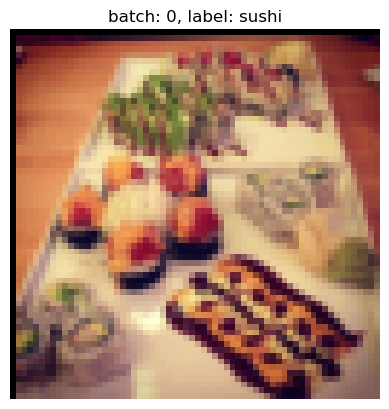

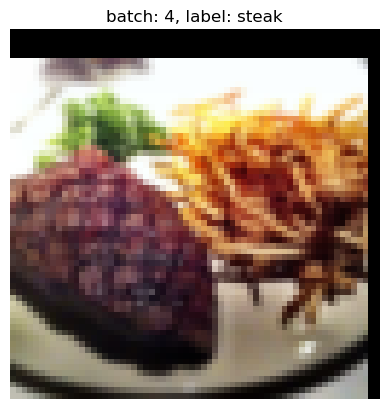

In [21]:
for batch, (X, y) in enumerate(iter(trainDataLoader)):

    if (batch%4 == 0):
        image = X[0]
        label = class_names[y[0]]

        plt.imshow(image.permute(1, 2, 0)) 
        plt.title(f"batch: {batch}, label: {label}")
        plt.axis(False)
        plt.show()
    

### Option 2: Creating our own helper functions for datasetss and dataloaders

#### Creating a custom dataset
1. Load images from a file
2. Get class names from the Dataset
3. Get class names to labels dictionary from the Dataset

##### Replicating .classes and .class_to_idx

1. Get the class names using `os.scandir()` to traverse a target directory (ideally in the standard image classification format)
2. Raise an error if the class names are not found (something may be wrong with the directory structure)
3. Turn the class names into a dict and a list and return them

In [22]:
target_directory = train_path
target_directory

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [23]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted([entry.name for entry in list(os.scandir(directory))])

    if not classes:
        raise FileNotFoundError(f"No class directories found in {directory}")

    class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

    return classes, class_to_idx

In [24]:
find_classes(train_path)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Now we would like to create a custom class which will override the default DataSet class in pytorch. Just like it was compulsory to override `forward()` for custom models, here it is compulsory to override:
1. `__getitem__()` -> return a sample when passed an index
2. `__len__()` -> Get the length of the datatset


For the object we would like the following attributes:
1. paths -> paths to our images
2. transform
3. classes -> a list of the classes
4. class_to_idx -> a dictionary of the classes mapped to their corresponding labels

We would also like a function to `load the images`

In [25]:
# 1. Subclass the torch.utils.data.Dataset class

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None):

        self.paths = list(Path(targ_dir).rglob("*/*.jpg"))
        self.transform = transform

        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_images(self, index: int) -> Image.Image:
        return Image.open(self.paths[index])
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        image = self.load_images(index)
        label = self.class_to_idx[self.paths[index].parent.name]

        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)

        return image, label 


In [26]:
transform = transforms.Compose([
    transforms.Resize(size=[64, 64]),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])

In [27]:
trainDataCustom = ImageFolderCustom(train_path, transform)
testDataCustom = ImageFolderCustom(test_path, transform)

In [28]:
trainDataCustom[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          ...,
          [0.1686, 0.1686, 0.1725,  ..., 0.1412, 0.1333, 0.1294],
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          ...,
          [0.2392, 0.2431, 0.2549,  ..., 0.1569, 0.1451, 0.1333],
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ...,

In [29]:
def random_image_transform_from_custom_dataset(train_data: Dataset):

    random_num = random.randint(0, len(train_data))
    random_image, random_image_class = train_data[random_num]

    img_to_numpy = random_image.permute(1, 2, 0).numpy()
    print(img_to_numpy.shape)

    plt.imshow(img_to_numpy)
    plt.title(f"Image class: {class_names[random_image_class]}, Shape: {random_image.shape}")
    plt.axis(False)
    plt.show()

(64, 64, 3)


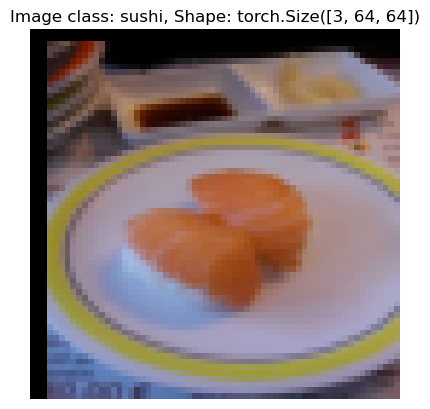

In [30]:
random_image_transform_from_custom_dataset(trainDataCustom)

### Creating a custom dataloader

In [31]:
customTrainLoader = DataLoader(trainDataCustom, batch_size=32, shuffle=True)
customTestLoader = DataLoader(testDataCustom, batch_size=32, shuffle=False)

In [32]:
customTrainLoader, customTestLoader

(<torch.utils.data.dataloader.DataLoader at 0x286e4a2fbe0>,
 <torch.utils.data.dataloader.DataLoader at 0x286e4a2dbd0>)

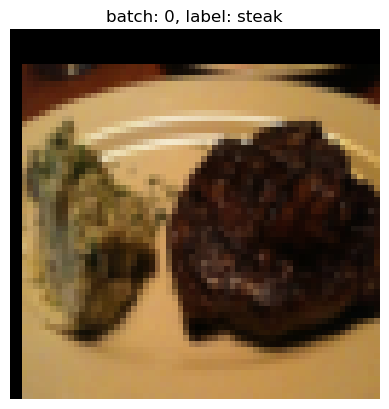

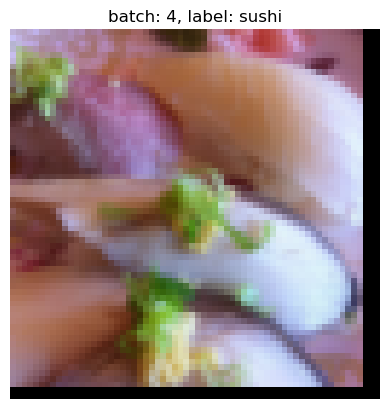

In [33]:
for batch, (X, y) in enumerate(iter(customTrainLoader)):

    if (batch%4 == 0):
        image = X[0]
        label = class_names[y[0]]

        plt.imshow(image.permute(1, 2, 0))
        plt.title(f"batch: {batch}, label: {label}")
        plt.axis(False)
        plt.show()
    

## Other forms of transforms

In [34]:
train_transform = transforms.Compose([
    transforms.Resize(size=[64, 64]),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=[64, 64]),
    transforms.ToTensor()
])

(512, 512, 3)


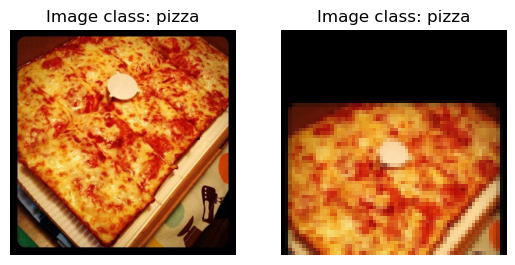

In [35]:
random_image_transform(train_images, train_transform)

In [36]:
trainDataCustom = ImageFolderCustom(train_path, train_transform)
testDataCustom = ImageFolderCustom(test_path, test_transform)


customTrainLoader = DataLoader(trainDataCustom, batch_size=32, shuffle=True)
customTestLoader = DataLoader(testDataCustom, batch_size=32, shuffle=False)

## Building a Baseline Model (TinyVGG)

In [37]:
class BaselineModel(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels = 20, out_channels=30, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 30, out_channels=40, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10240, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        X = self.conv_block1(x)
        X = self.conv_block2(X)
        return self.classifier(X)

In [38]:
def training_loop(model,
                  loss_fn,
                  optimizer,
                  epochs,
                  accuracy_fn,
                  trainDataLoader,
                  device):

    train_loss = []
    train_accuracy = []

    model.to(device)  # Ensure the model is on the correct device

    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch+1}\n-------------------------------")

        model.train()  # Set the model to training mode
        training_loss = 0
        training_accuracy = 0

        for batch, (X, y) in enumerate(trainDataLoader, start=1):
            # Move data and target to device
            X, y = X.to(device), y.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(X)
            
            # Compute loss
            loss = loss_fn(y_pred, y)
            training_loss += loss.item()
            
            # Compute accuracy
            training_accuracy += accuracy_fn(y, y_pred.argmax(dim=1))
            
            # Backward pass
            loss.backward()
            optimizer.step()

            if batch % 400 == 0:
                print(f"Done with {batch} batches")

        # Calculate average loss and accuracy for the epoch
        training_loss /= len(trainDataLoader)
        training_accuracy /= len(trainDataLoader)

        # Store loss and accuracy
        train_loss.append(training_loss)
        train_accuracy.append(training_accuracy)

        print(f"Epoch {epoch+1} Training Loss: {training_loss:.4f} | Training Accuracy: {training_accuracy:.2f}")
    
    return train_loss, train_accuracy


In [39]:
def testing_loop(model,
                 testDataLoader,
                 loss_fn,
                 accuracy_fn,
                 device
                 ):
    
    model.to(device)
    model.eval()

    with torch.inference_mode():
        testing_loss = 0
        testing_accuracy = 0

        for X, y in testDataLoader:

            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            testing_loss += loss.item()

            testing_accuracy += accuracy_fn(y, y_pred.argmax(1))

        testing_loss /= len(testDataLoader)
        testing_accuracy /= len(testDataLoader)

        print(f"Testing Loss: {testing_loss:.4f} | Testing Accuracy: {testing_accuracy:.2f}%")

In [40]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [41]:
model_0 = BaselineModel(input_shape=1, hidden_units=128, output_shape=3)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.0001)

In [42]:
train_loss, train_accuracy = training_loop(model_0, loss_fn, optimizer, 5, accuracy_fn, customTrainLoader, device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------


 20%|██        | 1/5 [00:02<00:09,  2.48s/it]

Epoch 1 Training Loss: 1.1007 | Training Accuracy: 29.30
Epoch 2
-------------------------------


 40%|████      | 2/5 [00:03<00:05,  1.78s/it]

Epoch 2 Training Loss: 1.0972 | Training Accuracy: 41.41
Epoch 3
-------------------------------


 60%|██████    | 3/5 [00:05<00:03,  1.54s/it]

Epoch 3 Training Loss: 1.0962 | Training Accuracy: 41.41
Epoch 4
-------------------------------


 80%|████████  | 4/5 [00:06<00:01,  1.39s/it]

Epoch 4 Training Loss: 1.0999 | Training Accuracy: 29.30
Epoch 5
-------------------------------


100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

Epoch 5 Training Loss: 1.0983 | Training Accuracy: 29.30


In [43]:
testing_loop(model_0, customTestLoader, loss_fn, accuracy_fn, device)

Testing Loss: 1.1044 | Testing Accuracy: 19.79%


In [44]:
import torchinfo

model_info = torchinfo.summary(model_0, input_size=(32, 3, 64, 64))
model_info

Layer (type:depth-idx)                   Output Shape              Param #
BaselineModel                            [32, 3]                   --
├─Sequential: 1-1                        [32, 20, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 20, 64, 64]          1,820
│    └─ReLU: 2-4                         [32, 20, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 20, 32, 32]          --
├─Sequential: 1-2                        [32, 40, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 30, 32, 32]          5,430
│    └─ReLU: 2-7                         [32, 30, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 40, 32, 32]          10,840
│    └─ReLU: 2-9                         [32, 40, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 40, 16, 16]          --
├─Se

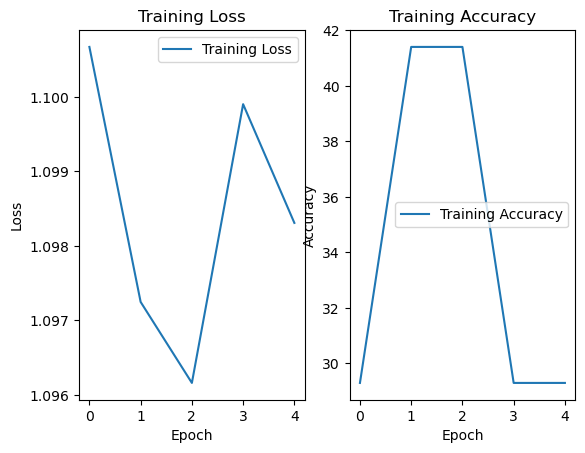

In [45]:
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.show()